# Project 2 Proposal Exploration

This notebook contains the EDA used for the project proposal. Below are the following two sections:

1. Basic Data Exploration
2. Data Visualization

## Section 1: Basic Data Exploration

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pandas options
pd.set_option('display.max_columns', None)

# Load data
spotify_df = pd.read_csv("spotify-2023.csv", encoding_errors='replace')

In [2]:
# View data
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [3]:
# Describe data
spotify_df[['artist_count', 'released_year', 'released_month', 'released_day', 'bpm']].describe()

,artist_count,released_year,released_month,released_day,bpm
count,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,122.540399
std,0.893044,11.116218,3.566435,9.201949,28.057802
min,1.000000,1930.000000,1.000000,1.000000,65.000000
25%,1.000000,2020.000000,3.000000,6.000000,100.000000
50%,1.000000,2022.000000,6.000000,13.000000,121.000000
75%,2.000000,2022.000000,9.000000,22.000000,140.000000
max,8.000000,2023.000000,12.000000,31.000000,206.000000


In [4]:
# Key summary
spotify_df['key'].value_counts(dropna = False).to_frame()

,count
key,
C#,120
G,96
NaN,95
G#,91
F,89
B,81
D,81
A,75
F#,73


In [5]:
# Mode summary
spotify_df['mode'].value_counts(dropna = False).to_frame()

,count
mode,
Major,550
Minor,403


In [9]:
# Sort data
spotify_df.sort_values(by = ['released_year', 'released_month', 'released_day'], ascending = False)
spotify_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


## Section 2: Data Visualization

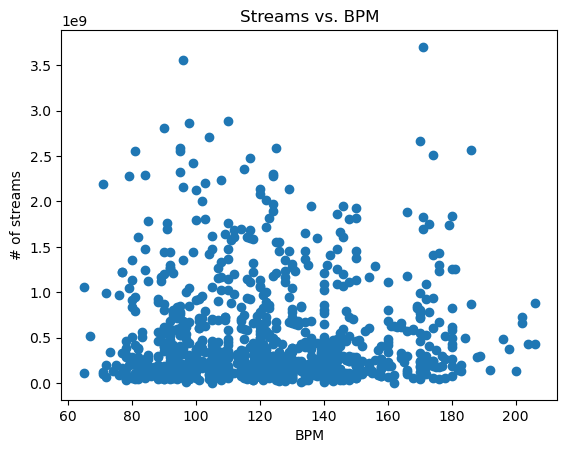

In [46]:
# Fix streams variable
spotify_df['streams'] = pd.to_numeric(spotify_df['streams'], errors='coerce')

# Plot streams vs. bpm
streams_bpm_plt = plt.scatter(spotify_df['bpm'], spotify_df['streams'])

# Label plot
plt.title('Streams vs. BPM')
plt.xlabel('BPM')
plt.ylabel('# of streams')

# Show plot
streams_bpm_plt

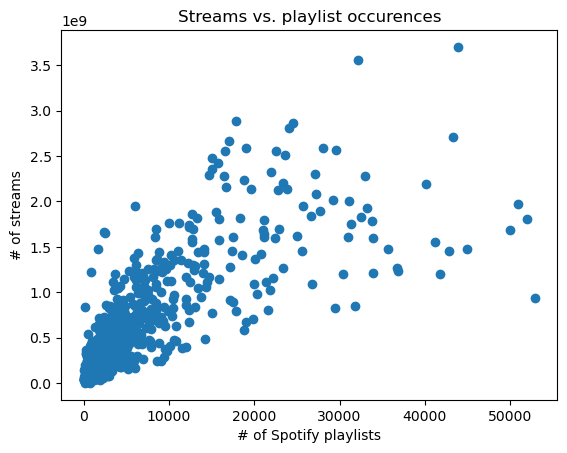

In [47]:
# Plot streams vs. in_spotify_playlists
streams_playlists_plt = plt.scatter(spotify_df['in_spotify_playlists'], spotify_df['streams'])

# Label plot
plt.title('Streams vs. playlist occurences')
plt.xlabel('# of Spotify playlists')
plt.ylabel('# of streams')

# Show plot
streams_playlists_plt

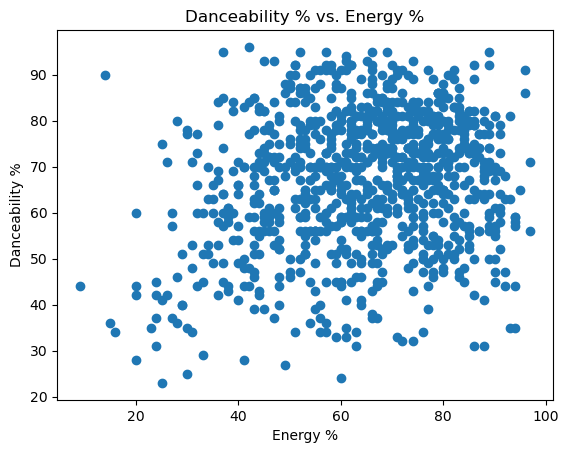

In [40]:
# Plot danceability_% vs. energy_%
dance_energy_plt = plt.scatter(spotify_df['energy_%'], spotify_df['danceability_%'])

# Label plot
plt.title('Danceability % vs. Energy %')
plt.xlabel('Energy %')
plt.ylabel('Danceability %')

# Show plot
dance_energy_plt